<a href="https://colab.research.google.com/github/harshitgupta2000/Marketing-Campaign-for-Banking-Products/blob/master/INTERNSHIP-PROJECT(MARKETING%20ANALYSIS%20FOR%20BANKING%20PRODUCTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES, CHECKING DATATYPE, STATISTICAL SUMMARY OF DATA**

In [1]:
#Importing The Required Libraries for my project 
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt          
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [51]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [52]:

#Displaying the top 5 rows 
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [53]:
#Displaying the botton 5 rows
df.tail(5)  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [54]:
#Checking the summary and basic information about data and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [55]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [56]:
# Replacing the negative values in dataframe just for practice but this only replaces selected values
df['Experience'].replace(to_replace= -1,value = np.nan,inplace = True)
df['Experience'].replace(to_replace= -2,value = np.nan,inplace = True)
df['Experience'].replace(to_replace= -3,value = np.nan,inplace = True)
df['Experience'].fillna(df['Experience'].median(),inplace=True)


In [57]:
neg = df.Experience < 0        #Experience cannot be negative
neg.value_counts()

False    5000
Name: Experience, dtype: int64

In [58]:
df['Experience'] = abs(df['Experience'])    #Replacing negative values with absolute values

In [59]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**DROPPING IRRELEVENT COLUMNS AND ROWS**

In [60]:
#Dropping Irrelevant columns and rows
df = df.drop(['ID','Experience'],axis=1)


In [61]:
df   #Just checking

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


**EXPLORATORY DATA ANALYSIS**

In [62]:
df.isnull().values.any()   #Checking if there are any null values present

False

In [63]:
print(df.isnull().sum()) #Checking if there are any null values with another method

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [64]:
df = df.dropna()    # Here we are dropping the missing values, this doesnt needed but i am showing
df.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [65]:
for col in df:
    print(col,':',df[col].nunique())   #FOR NUMBER OF UNIQUES

Age : 45
Income : 162
ZIP Code : 467
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
Personal Loan : 2
Securities Account : 2
CD Account : 2
Online : 2
CreditCard : 2


In [66]:
df

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [67]:
#HERE I M CHECKING THE NUMBER OF PEOPLE WITH ZERO MORTAGE AS TOLD
count = 0
for i in df['Mortgage']:
  if i == 0:
      count += 1

print(count)

3462


In [68]:
df['CCAvg'].isin([0]).sum()   #Number of people with zero credit card spending per month

106

In [69]:
df['Mortgage'].isin([0]).sum()

3462

In [70]:
#Simplifying the column names for better understanding
df.columns = ["Age","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
df.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
#Value Counts for Categorical Variables

print(df.Online.value_counts())
print(df.PersonalLoan.value_counts())
print(df.SecuritiesAccount.value_counts())
print(df.CDAccount.value_counts())
print(df.CreditCard.value_counts())
print(df.Family.value_counts())
print(df.Education.value_counts())

1    2984
0    2016
Name: Online, dtype: int64
0    4520
1     480
Name: PersonalLoan, dtype: int64
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
0    4698
1     302
Name: CDAccount, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


**UNIVARIATE ANALYSYS AND BIVARIATE ANALYSYS:**

---



Univariate Analysis
Categorical Variables



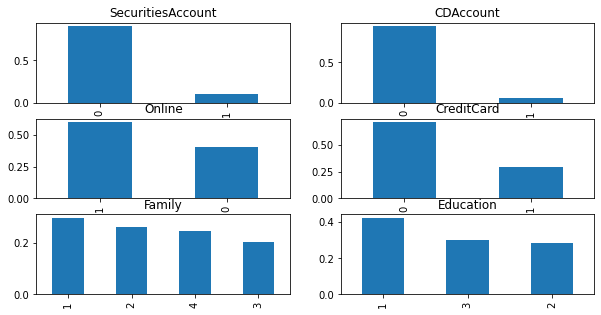

In [72]:
print("Univariate Analysis")
print("Categorical Variables")
print()

plt.figure(figsize=(10,5))  
for i,j in enumerate(['SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard', 'Family', 'Education']):
    plt.subplot(3,2,i+1) 
    df[j].value_counts(normalize=True).plot.bar(title= j)
plt.show()

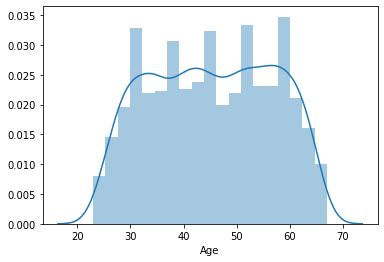

In [73]:
sns.distplot(df.Age);
#Age seems to have symmetric distribution

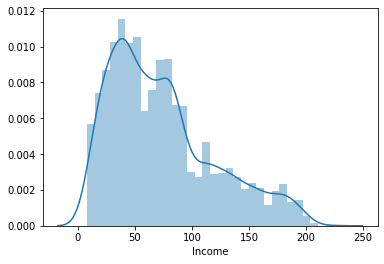

In [74]:
sns.distplot(df.Income); #Income is rightly skewed

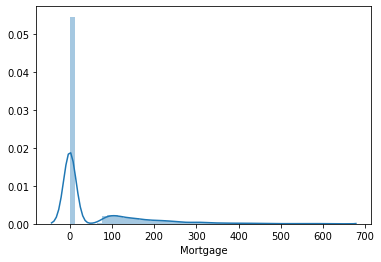

In [75]:
sns.distplot(df.Mortgage);  #Credit Card Avg seems to be rightly skewed

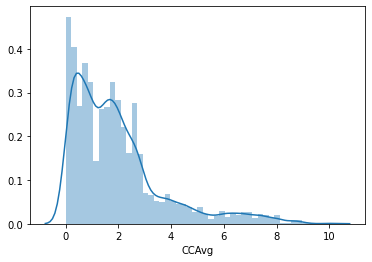

In [76]:
sns.distplot(df.CCAvg);  #Mortgage is seems to be highly skewed

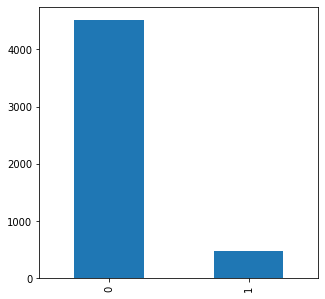

In [77]:
plt.figure(figsize=(5,5))
df['PersonalLoan'].value_counts().plot.bar()

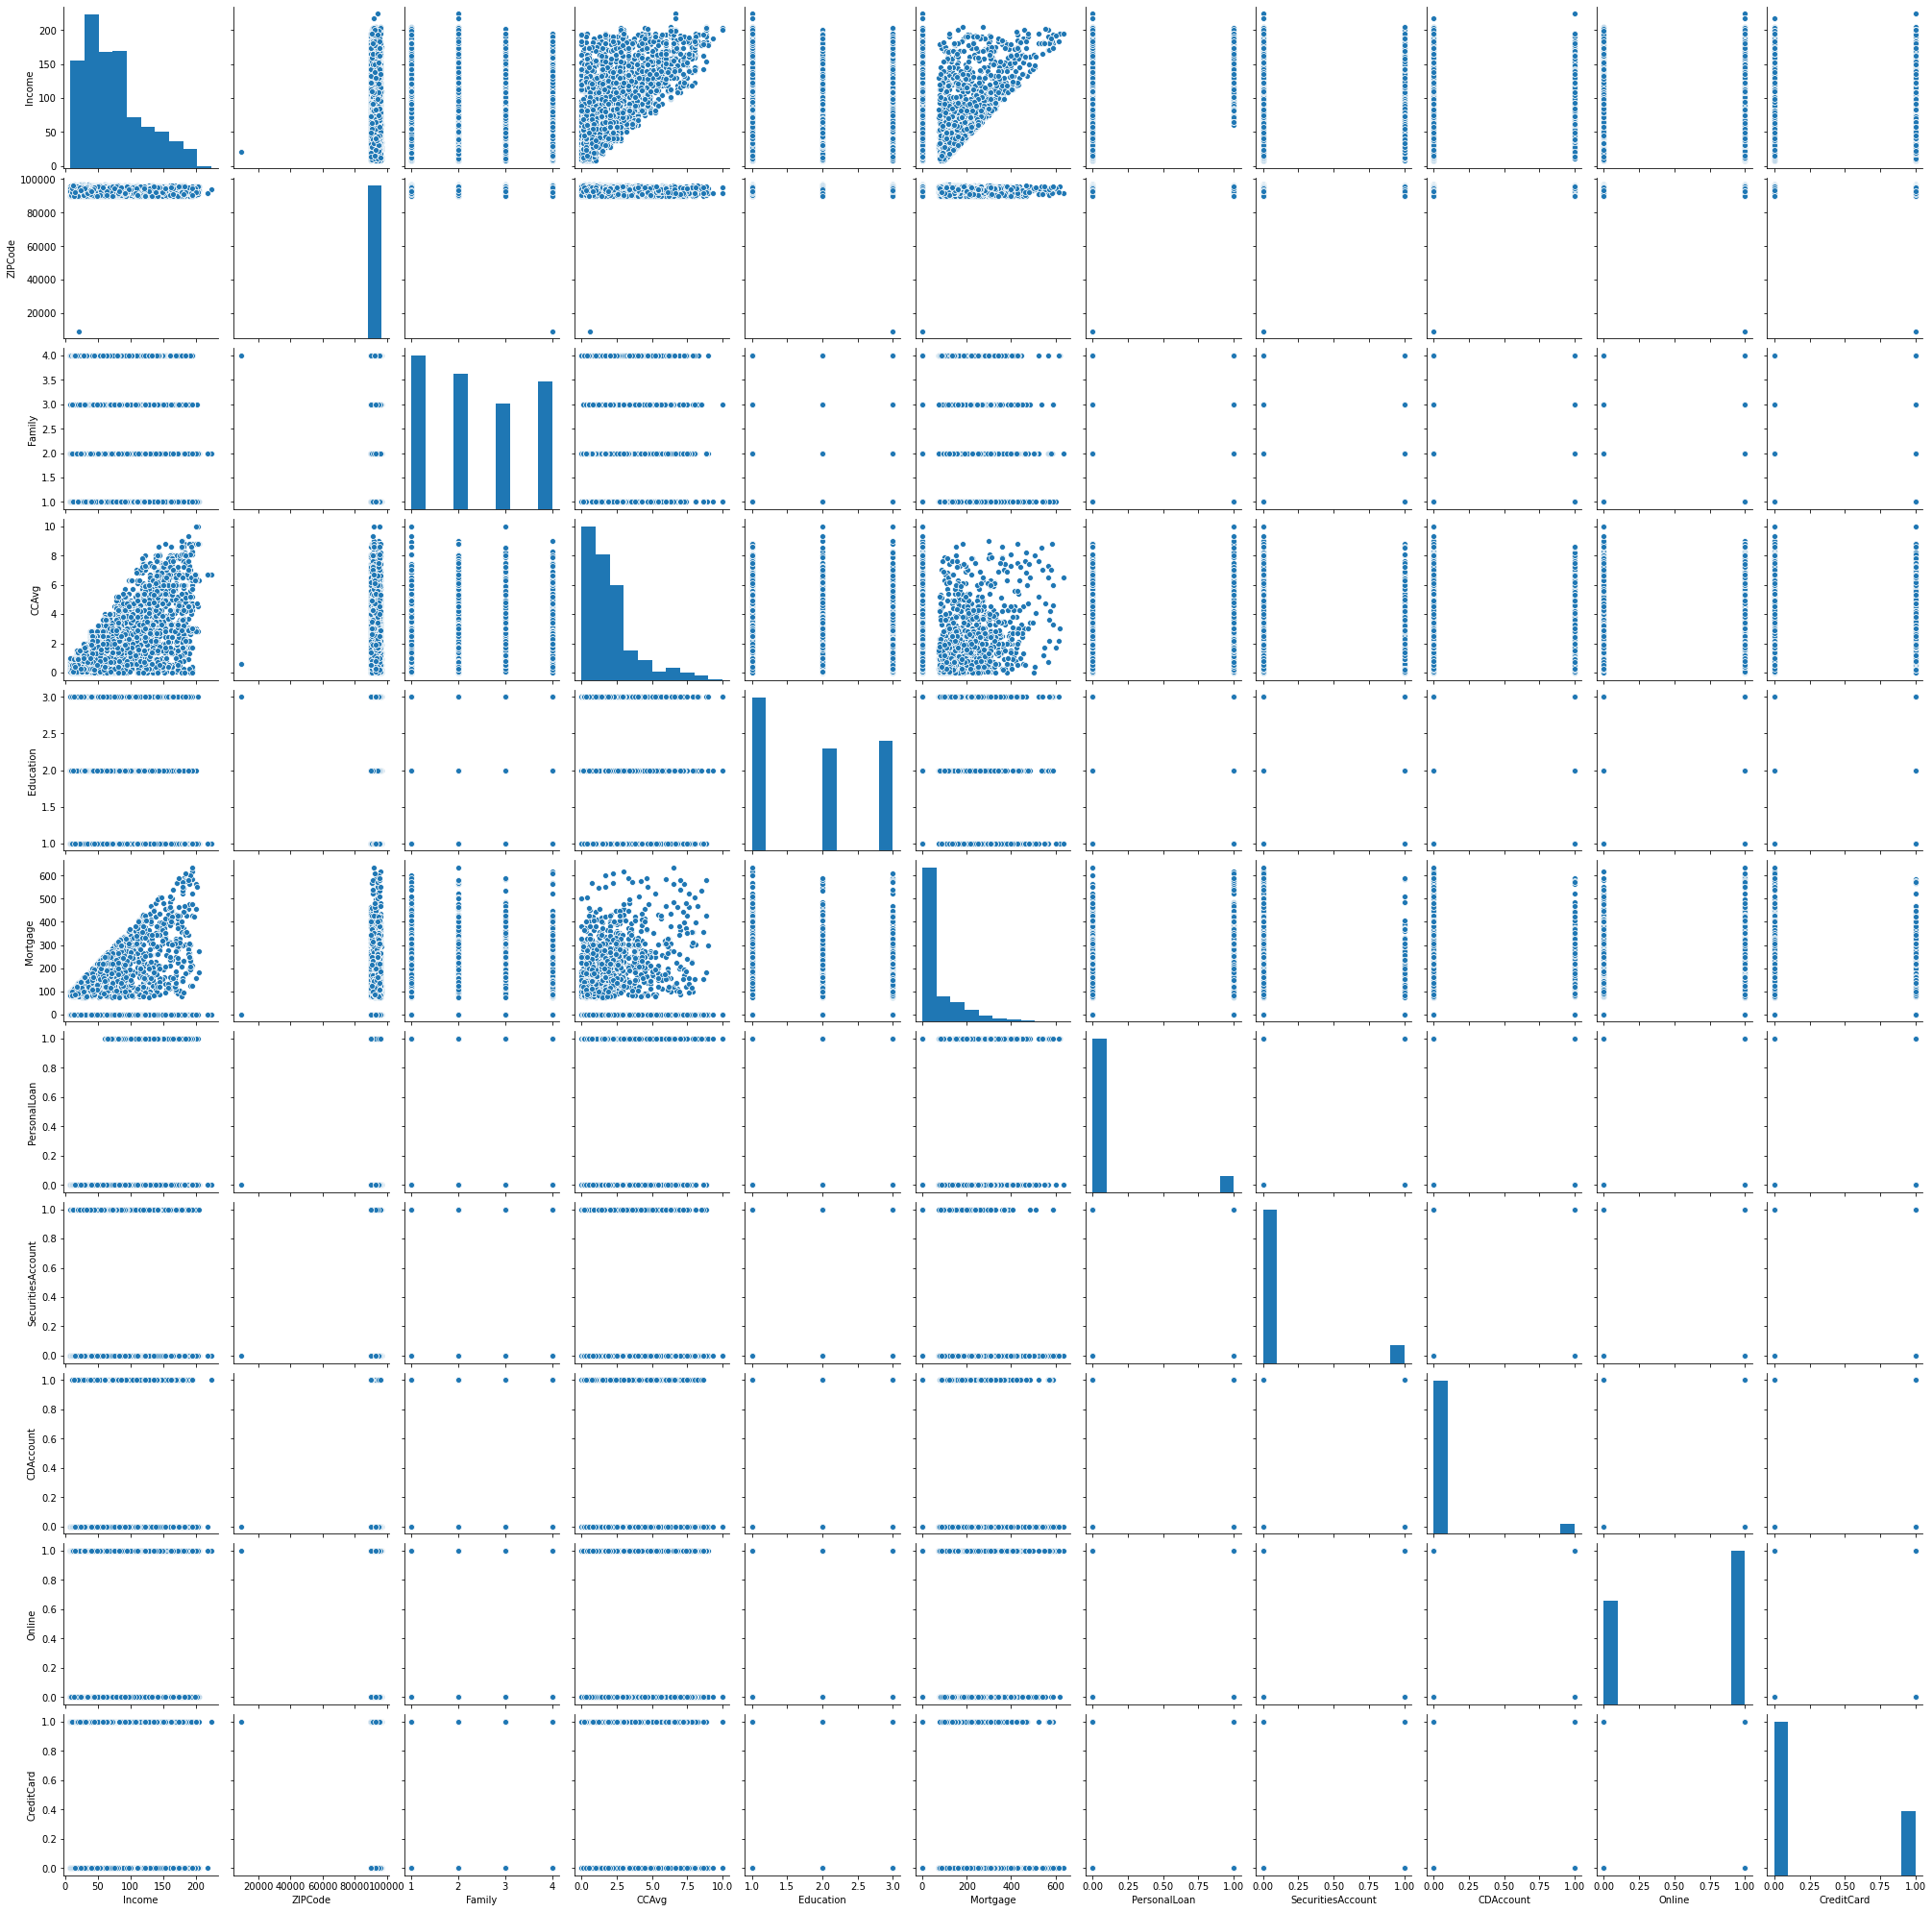

In [78]:
#THIS SHOWS THE CORELATION BETWEEN EACH AND EVERY COLUMN PAIR OF THE DATASET, SOME OF THEM ARE USEFUL.

sns.pairplot(df.iloc[:,1:])

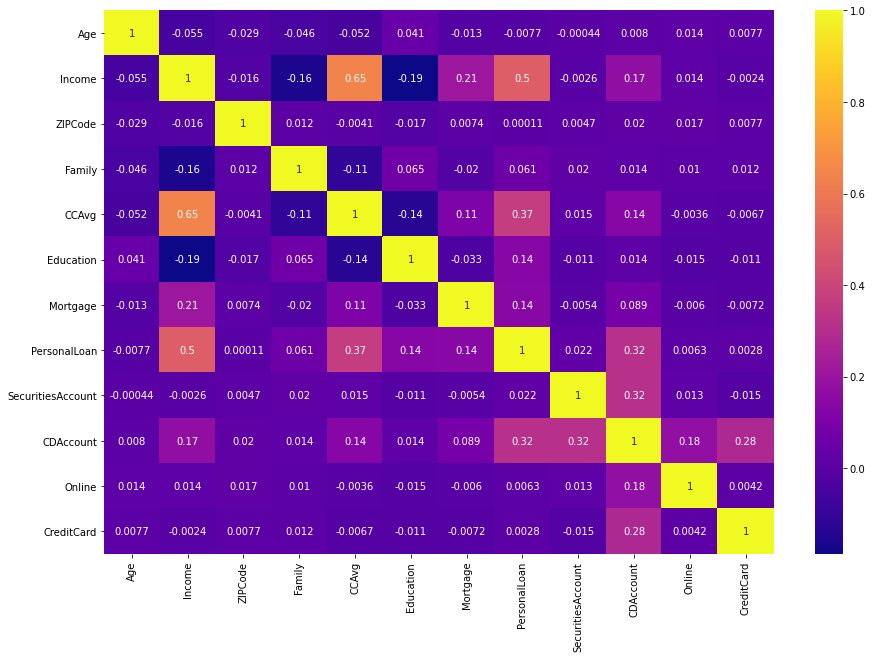

In [79]:
#This confusion matrix shows the correlation between valus
# Income and CCAvg are correlated

corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma', annot=True);

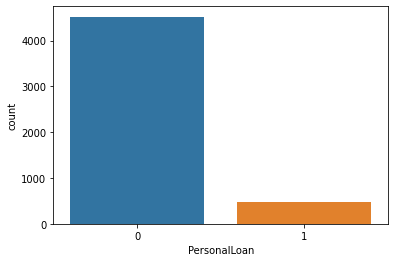

In [80]:
# SHOW COUNT OF PEOPLE WHO HAVE TAKEN A LOAN and WHO HAVE NOT TAKEN LOAN
sns.countplot(x='PersonalLoan',data=df)

Text(0, 0.5, 'education')

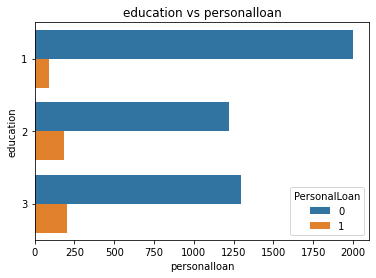

In [81]:
sns.countplot(y = 'Education', data = df, hue = 'PersonalLoan')
plt.title('education vs personalloan')
plt.xlabel('personalloan')
plt.ylabel('education')

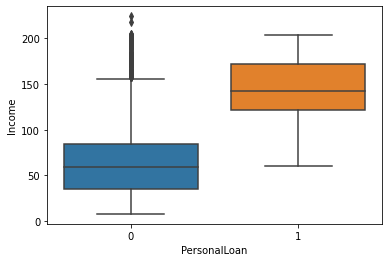

In [82]:
sns.boxplot(x='PersonalLoan',y='Income',data=df)

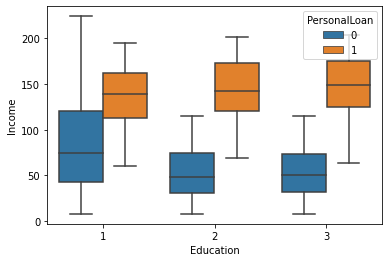

In [83]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=df)  #WE FOUND NO CORRELATION BETWEEN PERSONAL LOAN  AND AGE 

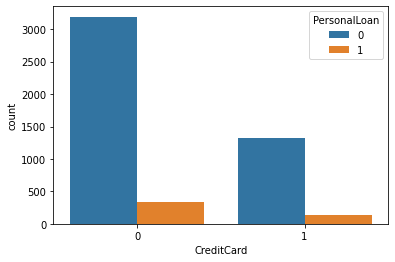

In [84]:
# CUSTOMERS WITH NO CREDIT CARDS ARE LESS LIKELY TO TAKE LOANS.
sns.countplot(x='CreditCard',hue='PersonalLoan',data=df)

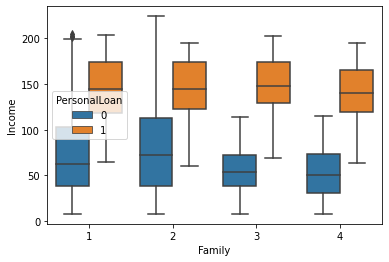

In [85]:
#FAMILIES WITH HIGHER INCOME ARE MORE LIKELY TO TAKE LOANS.
sns.boxplot(x='Family',y='Income',hue='PersonalLoan',data=df)

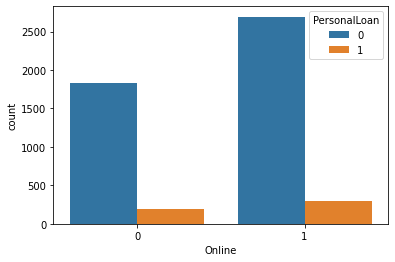

In [86]:
# NO CORRELATION BETWEEN A CUSTOMER USING ONLINE FACILITIES AND TAKING A PERSONAL LOAN.
sns.countplot(x='Online',hue='PersonalLoan',data=df)

In [87]:
x = df[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount']]
y = df['PersonalLoan'].values

**APPLYING NECESSARY TRANSFORMATIONS FOR FEATURE VARIABLES FOR REMOVING SKEWNESS FROM FEATURE VARIABLES**

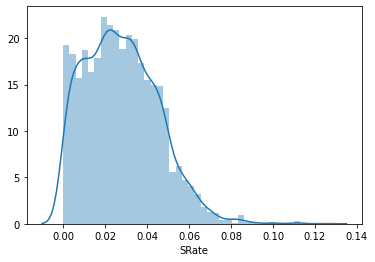

In [88]:
df['SRate'] = df['CCAvg'] / df['Income']
sns.distplot(df['SRate'])

*INCOME AND CCAVG ARE SKEWED SO I AM GOING TO REMOVE THAT* 

In [89]:
#features = ['Age', 'Income', 'Family', 'CCAvg', 'Education',
            #'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount',
            #'Online', 'CreditCard','SRate']

#df = df[features]

#print(" Structure of Model features : ",df.shape)
#.head()

In [90]:
from sklearn.preprocessing import PowerTransformer

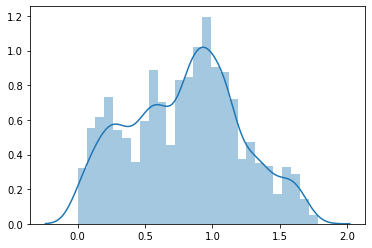

In [91]:
trans = PowerTransformer(method = "yeo-johnson", standardize = False)
trans.fit(df['CCAvg'].values.reshape(-1,1))
val = trans.transform(df['CCAvg'].values.reshape(-1,1))
sns.distplot(val)

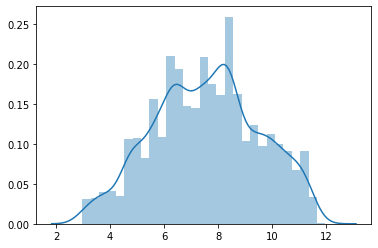

In [92]:
trans = PowerTransformer(method = "yeo-johnson", standardize = False)
trans.fit(df['Income'].values.reshape(-1,1))
val = trans.transform(df['Income'].values.reshape(-1,1))
sns.distplot(val)

THE PROBLEM WITH INCOME AND CCAVG IS NOW RESOLVED

In [ ]:
#OUTLIER TREATMENT
x['Mortgage_new'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

MORTGAGE, WE HAVE TO TRANSFORM IT

**NORMALIZING AND SPLITTING THE DATA INTO TRAINING AND TEST IN THE RATIO OF 70:30**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
ss_x.fit_transform(x_train)
ss_x.transform(x_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

**USING LOGISTIC REGRESSION MODEL TO PREDICT THE LIKELIHOOD OF A CUSTOMER HAVING PERSONAL LOANS**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train,model.predict(x_train), normalize=True)
print(" TRAINING SCORE :",float(score*100),end='%')

 TRAINING SCORE : 94.97142857142858%

In [114]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred, normalize=True)
print(" TESTING SCORE :",float(score*100),end='%')

 TESTING SCORE : 94.46666666666667%

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.60      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500




HERE WE CAN CLERLY SEE THAT FOR LOGISTIC REGRESSION THE TESTING SCORE=94.971%
AND TRAINING SCORE = 94.466 , LETS HAVE A LOOK AT OTHER ALGOS

**PRINTING ALL METRICS FOR EVALUATING THE MODEL PERFORMANCE**

In [117]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error

In [118]:
print("THROUGH LOGISTIC REGRESSION")
print()
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

THROUGH LOGISTIC REGRESSION

Confusion Matrix : 
 [[1331   25]
 [  58   86]]


In [119]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))


F1 Score :  1.0


In [120]:
print("Area Under the ROC curve : ", round(roc_auc_score(y_test, y_pred),3))


Area Under the ROC curve :  0.789


In [121]:
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_pred),3))

Root Mean Squared Error (RMSE) :  0.055


In [122]:
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))

Mean Absolute Error :  0.055


**BUILDING VARIOUS OTHER CLASSIFICATION ALGORITHMS AND COMPARING THEIR PERFORMANCES**

In [131]:
from sklearn.ensemble import RandomForestClassifier

THROUGH RANDOM FOREST

In [132]:
rfmodel = RandomForestClassifier(max_depth=10, random_state=42)
rfmodel.fit(x_train,y_train)
rfmodel.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [133]:
score = rfmodel.score(x_train,y_train)
print(" TRAINING SCORE :",float(score*100),end='%')


 TRAINING SCORE : 99.88571428571429%

In [134]:
score = rfmodel.score(x_test,y_test)
print(" TESTING SCORE :",float(score*100),end='%')


 TESTING SCORE : 98.73333333333333%

In [135]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[1331   25]
 [  58   86]]


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.60      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [137]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_pred),3))

F1 Score :  1.0
Area Under the ROC curve Score :  0.789


In [138]:
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test, y_pred),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))

Root Mean Squared Error (RMSE) :  0.055
Mean Absolute Error :  0.055


RANDOM FOREST IS WORKING VERY GOOD AND PERFORMS A GOOD SCORE

THROUGH DECISION TREE

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dtmodel = DecisionTreeClassifier(random_state=1)
dtmodel.fit(x_train,y_train)
y_pred = dtmodel.predict(x_test)

In [141]:
score = dtmodel.score(x_train,y_train)
print(" TRAINING SCORE :",float(score*100),end='%')

 TRAINING SCORE : 100.0%

In [142]:

score = dtmodel.score(x_test,y_test)
print(" TESTING SCORE :",float(score*100),end='%')

 TESTING SCORE : 98.0%

In [143]:
confusion_matrix(y_test,y_pred)

array([[1341,   15],
       [  15,  129]])

In [144]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))
print("Area Under the ROC curve Score : ", round(roc_auc_score(y_test, y_pred),3))


F1 Score :  1.0
Area Under the ROC curve Score :  0.942


In [145]:
print("Root Mean Squared Error (RMSE) : ", round(mean_squared_error(y_test,y_pred),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))

Root Mean Squared Error (RMSE) :  0.02
Mean Absolute Error :  0.02


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



DECISION TREE ALGORITHM ALSO WORKING PRETTY GOOD AND ALSO ONE OF THE BEST FOR OUR MODEL

**THROUGH NAIVE BAYES**

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
nbmodel = GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred = nbmodel.predict(x_test)

In [149]:
score = nbmodel.score(x_train,y_train)
print(" TRAINING SCORE :",float(score*100),end='%')

 TRAINING SCORE : 88.05714285714285%

In [150]:
score = nbmodel.score(x_test,y_test)
print(" TESTING SCORE :",float(score*100),end='%')


 TESTING SCORE : 88.73333333333333%

In [151]:
confusion_matrix(y_test,y_pred)

array([[1243,  113],
       [  56,   88]])

In [152]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))
print("Area Under the ROC curve : ", round(roc_auc_score(y_test, y_pred),3))


F1 Score :  1.0
Area Under the ROC curve :  0.764


In [153]:
print("Root Mean Squared Error  : ", round(mean_squared_error(y_test, y_pred),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))


Root Mean Squared Error  :  0.113
Mean Absolute Error :  0.113


In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



IN NAIVE BAYES ALGORITHM OUR MODEL WILL NOT PERFORM AS GOOD AS OTHERS SO IT WILL NOT BE PREFFERED FOR OUR MODEL

**THROUGH KNN MODEL**

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

In [157]:
score = knnmodel.score(x_train,y_train)
print(" TRAINING SCORE :",float(score*100),end='%')

 TRAINING SCORE : 94.62857142857143%

In [158]:
score = knnmodel.score(x_test,y_test)
print(" TESTING SCORE :",float(score*100),end='%')

 TESTING SCORE : 92.46666666666667%

In [159]:
confusion_matrix(y_test,y_pred)

array([[1324,   32],
       [  81,   63]])

In [160]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))
print("Area Under the ROC curve : ", round(roc_auc_score(y_test, y_pred),3))


F1 Score :  1.0
Area Under the ROC curve :  0.707


In [161]:
print("Root Mean Squared Error : ", round(mean_squared_error(y_test, y_pred),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))


Root Mean Squared Error :  0.075
Mean Absolute Error :  0.075


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1356
           1       0.66      0.44      0.53       144

    accuracy                           0.92      1500
   macro avg       0.80      0.71      0.74      1500
weighted avg       0.92      0.92      0.92      1500



SO IT IS OBSERVED THAT KNN MODEL IS ALSO DOING A GREAT JOB!

**GRADIENT BOOST CLASSIFIER MODEL**

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
gbmodel = GradientBoostingClassifier(random_state=42)
gbmodel.fit(x_train,y_train)
y_pred = gbmodel.predict(x_test)

In [165]:
score = gbmodel.score(x_train,y_train)
print(" TRAINING SCORE :",float(score*100),end='%')

 TRAINING SCORE : 99.68571428571428%

In [166]:
score = gbmodel.score(x_test,y_test)
print(" TESTING SCORE :",float(score*100),end='%')

 TESTING SCORE : 98.6%

In [167]:
confusion_matrix(y_test,y_pred)

array([[1347,    9],
       [  12,  132]])

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.92      0.93       144

    accuracy                           0.99      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [169]:
print("F1 Score : ", round(f1_score(y_test, y_pred,3)))
print("Area Under the ROC curve : ", round(roc_auc_score(y_test, y_pred),3))


F1 Score :  1.0
Area Under the ROC curve :  0.955


In [170]:
print("Root Mean Squared Error : ", round(mean_squared_error(y_test, y_pred),3))
print("Mean Absolute Error : ", round(mean_absolute_error(y_test, y_pred),3))

Root Mean Squared Error :  0.014
Mean Absolute Error :  0.014


SO GRADIENT BOOSTER ALSO WORKS AMAZING IT CAN BE PREFFERED

**COMPARISON BETWEEN ALL ALGORITHMS WE HAVE USED:**

MODEL NAME   |      TRAINING SCORE    |   TEST SCORE


RANDOM FOREST|        99.885%         |       98.733%


LOGISTIC REGG|        94.971%         |       94.466% 

DECISION TREE  |100% |  98%

NAIVE BAYES | 88.057%  | 88.733%

KNN | 94.628  | 92.466


GRADIENT  |  99.685%  |  98.6%

**CONCLUSION:**

*DECISION TREE IS THE BEST LEARNING ALGORITHM FOR OUR MODEL WITH TRAINING SCORE OF 100% AND TEST SCORE OF 98%*

**BUSSINESS UNDERSTANDING OF OUR MODEL:**



1.   CUSTOMERS WITH CREDIT CARDS ARE LIKELY TO BE TAKING LOAN
2.   INCOME GIVE US A MAJOR IDEA WHETHER A PERSON IS TAKING THE LOAN OR NOT.


3.   THROUGH SOCIAL MEDIA PLATFORMS WE CAN REACH TO OUR CUSTOMERS IN A BETTER  MANNER.
4.  CONSIDER THE ALL THE CUSTOMERS WITH EQUAL RANKS.
5. CUSTOMERS WITH SECURITIES ACCOUNT ARE MORE PROBABLY TO TAKE LOAN
6. THE DECISION TREE MODEL IS MORE LIKELY A GOOD PREDICTOR AND TELL US MORE ACCURATELY THAT WHICH CUSTOMER IS MORE LIKELY TO TAKE LOAN.
7.  ONLINE OR DIGITAL TRANSACTIONS AND BANKING FACILITES ARE MORE PREFERABLY USED BY CUSTOMERS FOR APPLYING LOAN FACILITIES. 



